In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# run this cell to to mount the google drive if you are using google colab
from google.colab import drive
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/assignments/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(project_path + 'Assam_2015_2020_Full.csv',encoding='ISO-8859-1', error_bad_lines=False, delimiter=',')

In [ ]:
df.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KccAns,StateName,DistrictName,BlockName,CreatedOn
0,RABI,HORTICULTURE,Vegetables,Potato,\tPlant Protection\t,PROBLEM OF TERMITE IN POTATO.,ADVISED HIM TO APPLY TRICEL-20 @ 2 ML / LITRE ...,ASSAM,CACHAR,UDHARBOND,2015-01-01T10:55:30.423
1,RABI,HORTICULTURE,Vegetables,Cabbage,\tPlant Protection\t,CONTROL MEASURE OF LEAF EATING CATERPILLER .,SPRAY âMALATHION 50 ECâ @ 2 ML PER LITRE O...,ASSAM,CACHAR,KATIGORAH,2015-01-01T13:33:34.12
2,RABI,HORTICULTURE,Vegetables,Tomato,\tPlant Protection\t,ASKING CONTROL OF LATE BLIGHT ATTACK IN TOMATO,APPLY INDOFIL M-45/ANTRACOL @ 2 GRAM PER LITRE...,ASSAM,CACHAR,LAKHIPUR,2015-01-01T15:15:31.813
3,RABI,HORTICULTURE,Vegetables,Bitter Gourd,\tPlant Protection\t,CONTROL MEASURES OF APHIDS,ADVICE TO SPRAY ROGOR @ 2 ML/L WATER,ASSAM,CACHAR,NARSINGPUR,2015-01-03T07:46:46.007
4,RABI,HORTICULTURE,Vegetables,Bitter Gourd,\tPlant Protection\t,CONTROL MEASURE OF BLIGHT OF BITTER GOURD,SPRAY âINDOFIL M 45â @ 2 GM PER LITRE OF W...,ASSAM,CACHAR,NARSINGPUR,2015-01-03T13:06:51.653


In [ ]:
df.shape

(116163, 11)

In [ ]:
df.isna().sum()

Season          71764
Sector              0
Category            0
Crop                0
QueryType           0
QueryText           0
KccAns           1043
StateName           0
DistrictName        0
BlockName           0
CreatedOn           0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec7208bbe0>],
      dtype=object)

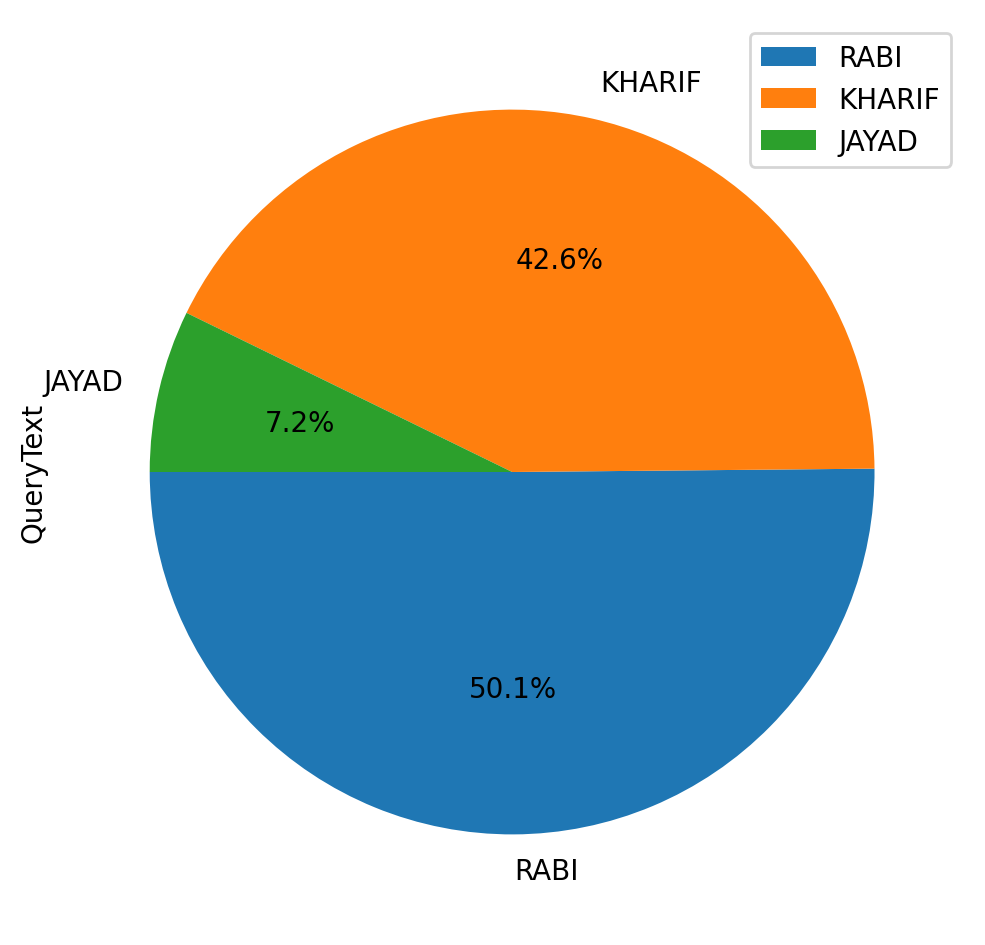

In [ ]:
#plt.rcParams["figure.figsize"] = [6, 6]
fig = plt.figure(figsize=(10,6), dpi=200)
ax = plt.subplot(111)
df.groupby(by=['Season']).count()[['QueryText']].sort_values(by = ['QueryText'], ascending=[False]).plot(kind="pie", ax=ax, autopct='%1.1f%%', startangle=180, subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec71ff53c8>],
      dtype=object)

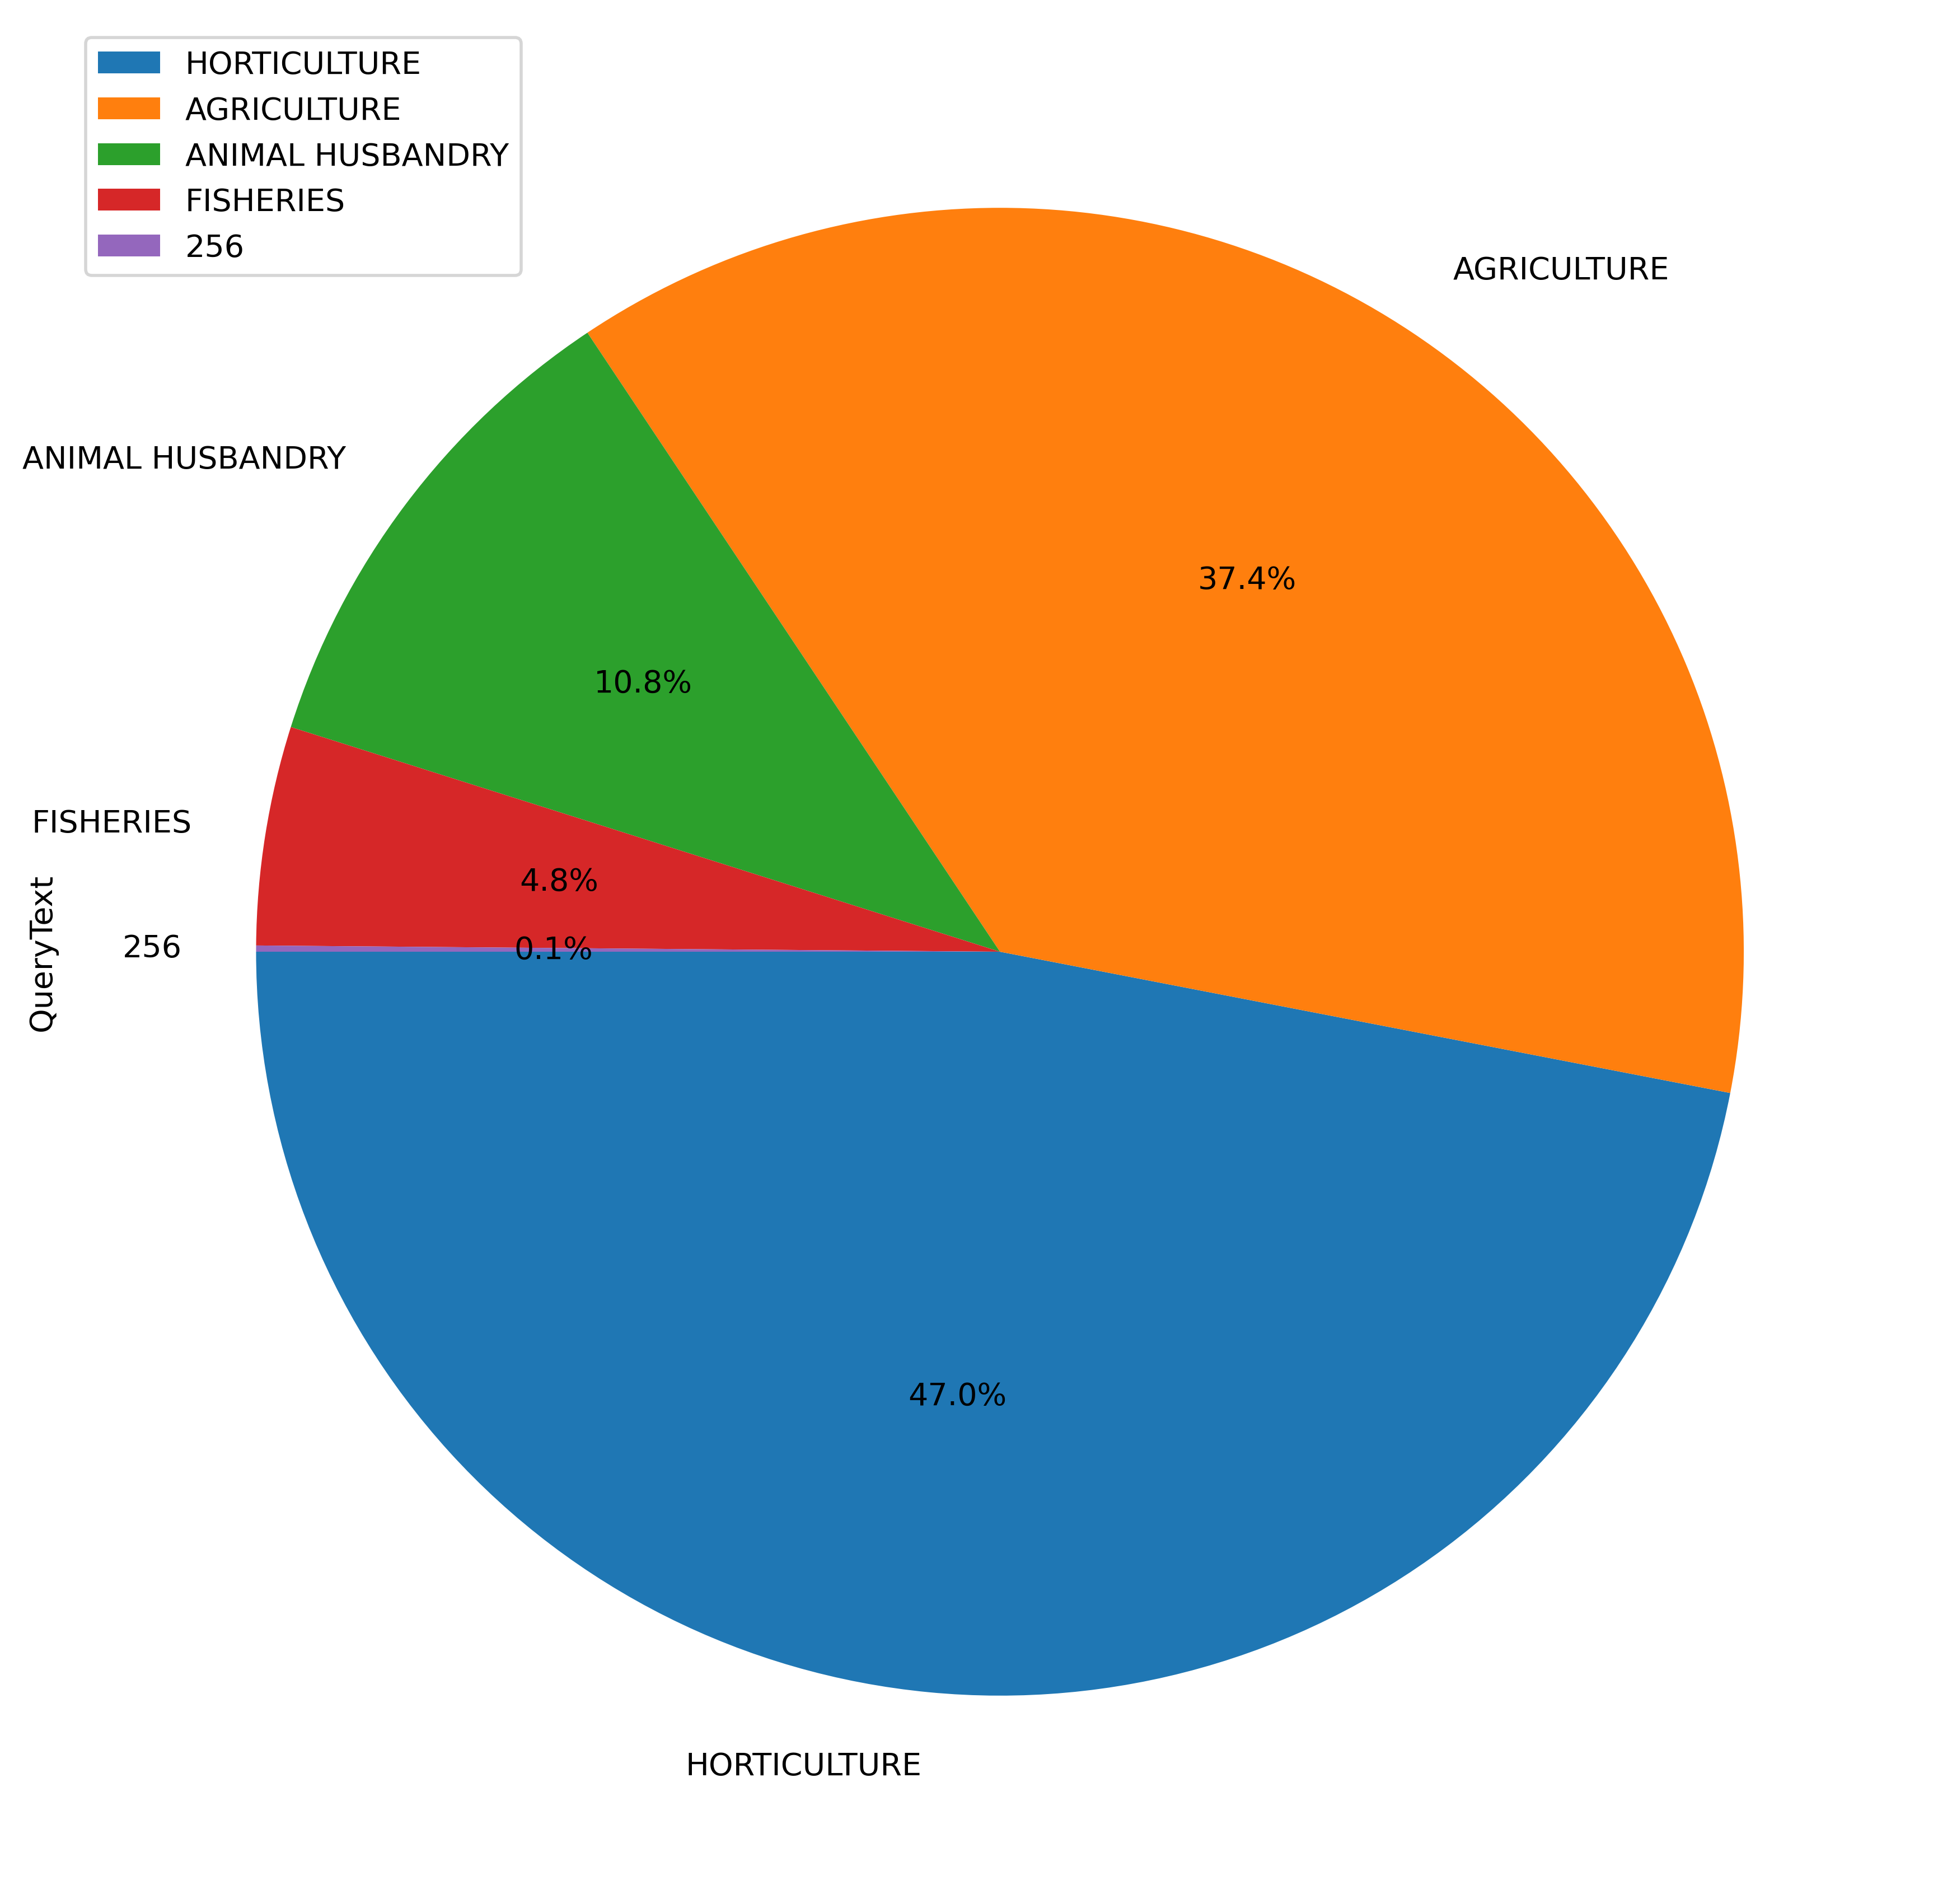

In [ ]:
fig = plt.figure(figsize=(11,11), dpi=400)
ax = plt.subplot(111)
df.groupby(by=['Sector']).count()[['QueryText']].sort_values(by = ['QueryText'], ascending=[False]).plot(kind="pie", ax=ax, autopct='%1.1f%%', startangle=180, subplots=True)


In [ ]:
df.dropna(subset = ['Season','Sector','Category','Crop','QueryType','QueryText','KccAns'], inplace=True)

In [ ]:
df.Sector.unique()

array(['HORTICULTURE', 'AGRICULTURE', 'ANIMAL HUSBANDRY', 'FISHERIES',
       '256'], dtype=object)

In [ ]:
df = df[(df.Sector.str.contains(r'[!^a-zA-Z]') == True)]

In [ ]:
df.count()

Season          44342
Sector          44342
Category        44342
Crop            44342
QueryType       44342
QueryText       44342
KccAns          44342
StateName       44342
DistrictName    44342
BlockName       44342
CreatedOn       44342
dtype: int64

In [ ]:
df.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
Vegetables                       18886
Cereals                           6880
Others                            6116
Fruits                            2932
Plantation Crops                  2325
Inland                            2016
Animal                            1405
Oilseeds                          1031
Medicinal and Aromatic Plants      807
Condiments and Spices              487
Pulses                             429
Sugar and Starch Crops             226
Millets                            200
Flowers                            196
Fiber Crops                        182
Avian                              149
Fodder Crops                        36
Beekeeping                          32
Marine                               3
Drug and Narcotics                   2
Green Manure                         2
Name: Category, dtype: int64

In [ ]:
#Considering only top 3 Category
df = df[((df['Sector']=='HORTICULTURE') | (df['Sector']=='AGRICULTURE')) & ((df['Category']=='Vegetables') | (df['Category']=='Cereals') | (df['Category']=='Others') | (df['Category']=='Fruits'))]

In [ ]:
df.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KccAns,StateName,DistrictName,BlockName,CreatedOn
0,RABI,HORTICULTURE,Vegetables,Potato,\tPlant Protection\t,PROBLEM OF TERMITE IN POTATO.,ADVISED HIM TO APPLY TRICEL-20 @ 2 ML / LITRE ...,ASSAM,CACHAR,UDHARBOND,2015-01-01T10:55:30.423
1,RABI,HORTICULTURE,Vegetables,Cabbage,\tPlant Protection\t,CONTROL MEASURE OF LEAF EATING CATERPILLER .,SPRAY âMALATHION 50 ECâ @ 2 ML PER LITRE O...,ASSAM,CACHAR,KATIGORAH,2015-01-01T13:33:34.12
2,RABI,HORTICULTURE,Vegetables,Tomato,\tPlant Protection\t,ASKING CONTROL OF LATE BLIGHT ATTACK IN TOMATO,APPLY INDOFIL M-45/ANTRACOL @ 2 GRAM PER LITRE...,ASSAM,CACHAR,LAKHIPUR,2015-01-01T15:15:31.813
3,RABI,HORTICULTURE,Vegetables,Bitter Gourd,\tPlant Protection\t,CONTROL MEASURES OF APHIDS,ADVICE TO SPRAY ROGOR @ 2 ML/L WATER,ASSAM,CACHAR,NARSINGPUR,2015-01-03T07:46:46.007
4,RABI,HORTICULTURE,Vegetables,Bitter Gourd,\tPlant Protection\t,CONTROL MEASURE OF BLIGHT OF BITTER GOURD,SPRAY âINDOFIL M 45â @ 2 GM PER LITRE OF W...,ASSAM,CACHAR,NARSINGPUR,2015-01-03T13:06:51.653


In [ ]:
df['Year'] = df.apply(lambda x: x['CreatedOn'][:4], axis=1)
df['Month'] = df.apply(lambda x: x['CreatedOn'][5:7], axis=1)
df['Day'] = df.apply(lambda x: x['CreatedOn'][8:10], axis=1)
df.loc[df['Sector'] == 'AGRICULTURE'].QueryType.value_counts()[:10]
df.loc[df['Sector'] == 'AGRICULTURE'].QueryType.value_counts()[:10].index.values



array(['Weather', '\tPlant Protection\t', 'Cultural Practices',
       'Nutrient Management', 'Fertilizer Use and Availability',
       'Government Schemes', '\tField Preparation\t', 'Seeds',
       'Weed Management', 'Varieties'], dtype=object)

In [ ]:
agridf = df.loc[df['Sector'] == 'AGRICULTURE'].loc[df['QueryType'].isin(df.loc[df['Sector'] == 'AGRICULTURE'].QueryType.value_counts()[:10].index.values)]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


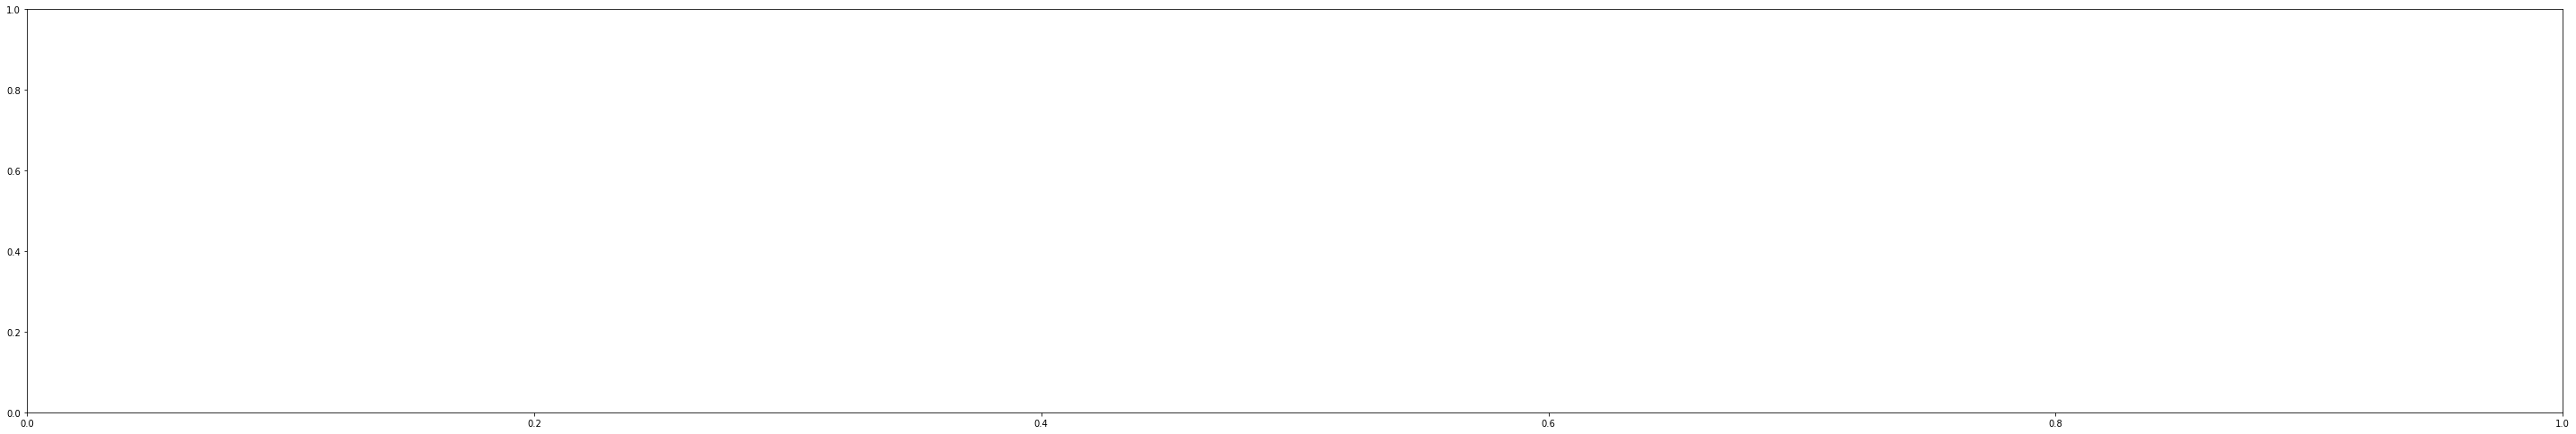

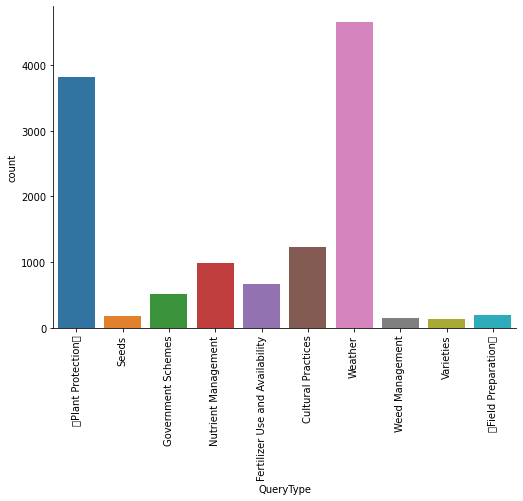

In [ ]:
a4_dims = (50.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

#g = sns.countplot(x="QueryType", data=agridf, orient="v", ax=ax)

g = sns.factorplot("QueryType", data=agridf, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

In [ ]:
agridf.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KccAns,StateName,DistrictName,BlockName,CreatedOn,Year,Month,Day
25,RABI,AGRICULTURE,Others,Others,\tPlant Protection\t,ASKING THAT HOW TO AVAIL KISAN CREDIT CARD FAC...,SUGGESTED TO CONTACT WITH NEAREST NATIONALIZED...,ASSAM,CACHAR,KALAIN,2015-01-21T14:57:20.093,2015,01,21
30,RABI,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,ASKING THAT HOW TO AVAIL KISAN CREDIT CARD FAC...,SUGGESTED TO CONTACT WITH AGRICULTURAL DVELOPM...,ASSAM,CACHAR,LAKHIPUR,2015-01-25T09:00:17.95,2015,01,25
33,RABI,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,CONTROL OF APHIDS IN PADDY,SPRAY TRICEL 20 @ 3 ML PER LITER OF WATER,ASSAM,CACHAR,TAPANG,2015-01-29T09:38:14.357,2015,01,29
39,RABI,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,ASKING CONTROL OF LEAF HOPPER ATTACK IN BORO RICE,SPRAY EKALUX @ 3 ML PER LITRE OF WATER,ASSAM,KARIMGANJ,RAMKRISHNA NAGAR,2015-01-02T15:57:38.447,2015,01,02
46,RABI,AGRICULTURE,Cereals,Paddy (Dhan),Seeds,ASKING WHERE TO AVAIL PADDY SEEDS,"ADVISED TO CONTACT WITH KRISHI VIGYAN KENDRA,K...",ASSAM,KARIMGANJ,RAMKRISHNA NAGAR,2015-01-05T19:19:53.143,2015,01,05


In [ ]:
agridf.shape

(12519, 14)

In [ ]:
agridf.to_csv('agri.csv')

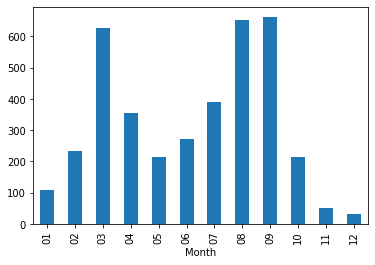

In [ ]:
agridf[(agridf['QueryType']=='\tPlant Protection\t')].groupby(["Month"]).count()['Day'].plot(kind='bar')

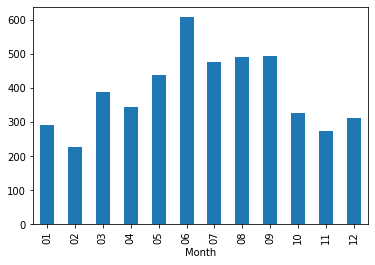

In [ ]:
agridf[(agridf['QueryType']=='Weather')].groupby(["Month"]).count()['Day'].plot(kind='bar')

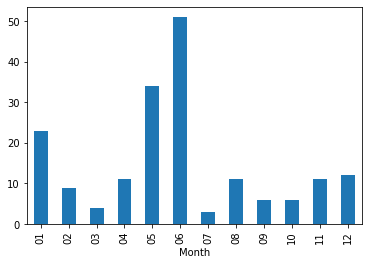

In [ ]:
agridf[(agridf['QueryType']=='Seeds')].groupby(["Month"]).count()['Day'].plot(kind='bar')

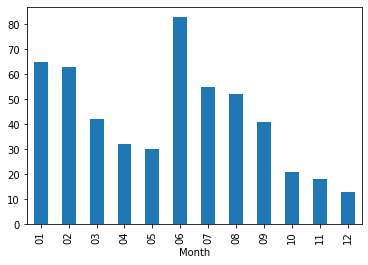

In [ ]:
agridf[(agridf['QueryType']=='Government Schemes')].groupby(["Month"]).count()['Day'].plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec6e786a90>],
      dtype=object)

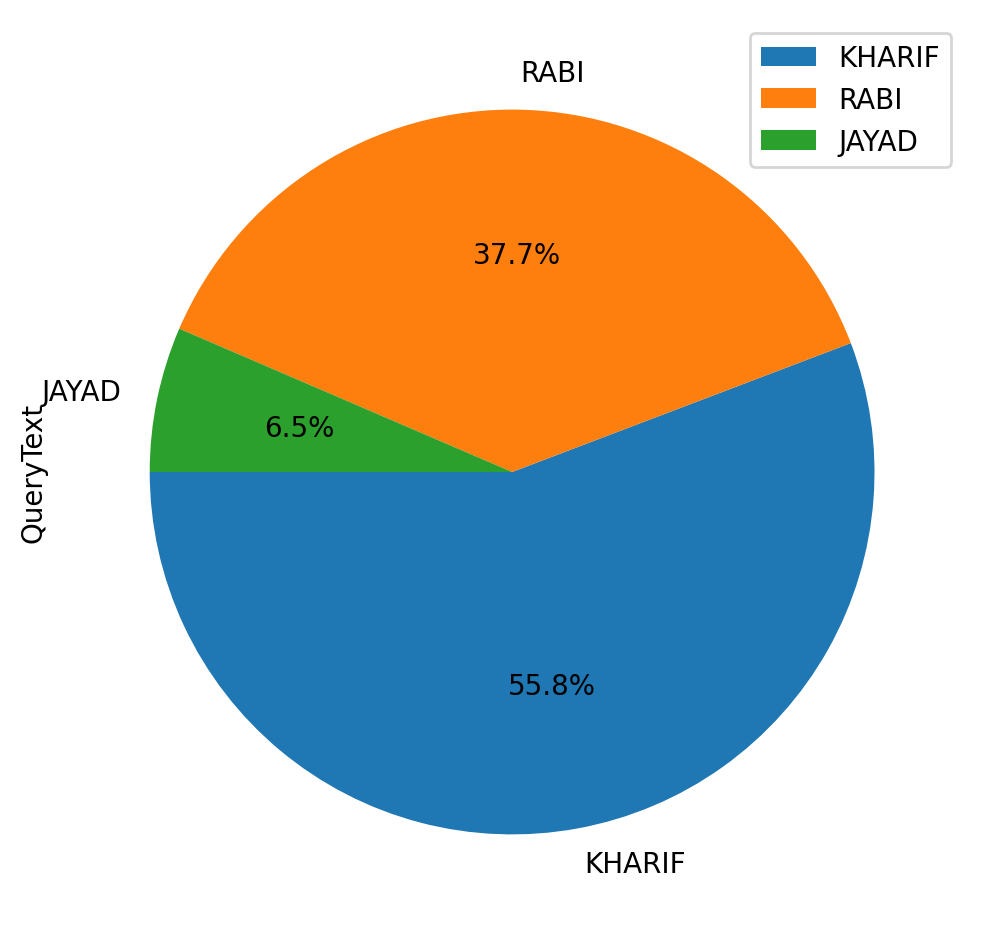

In [ ]:
fig = plt.figure(figsize=(10,6), dpi=200)
ax = plt.subplot(111)
agridf.groupby(by=['Season']).count()[['QueryText']].sort_values(by = ['QueryText'], ascending=[False]).plot(kind="pie", ax=ax, autopct='%1.1f%%', startangle=180, subplots=True)

In [ ]:
agridf[agridf.QueryType == "Government Schemes"]

,Season,Sector,Category,Crop,QueryType,QueryText,KccAns,StateName,DistrictName,BlockName,CreatedOn,Year,Month,Day
58,RABI,AGRICULTURE,Others,Others,Government Schemes,ASKING FOR GOVT SUBSIDISED SCHEME OF AGRICULTURE,#NAME?,ASSAM,KARIMGANJ,DULLAVCHERRA,2015-01-23T14:48:26.33,2015,01,23
80,RABI,AGRICULTURE,Others,Others,Government Schemes,ASKING ABOUT GOVT SUBSIDY SCHEME OF TRACTOR,PLEASE VISIT DIST AGRI OFFICE FOR THIS PURPOSE,ASSAM,GOALPARA,BALIJANA,2015-01-15T20:27:55.347,2015,01,15
155,RABI,AGRICULTURE,Others,Others,Government Schemes,ASKING THAT HOW TO AVAIL KISAN CREDIT CARD FAC...,SUGGESTED TO CONTACT WITH NEAREST NATIONALIZED...,ASSAM,DHUBRI,BILASIPARA,2015-01-12T07:30:07.357,2015,01,12
186,RABI,AGRICULTURE,Others,Others,Government Schemes,ASKING THAT HOW TO AVAIL KISAN CREDIT CARD FAC...,SUGGESTED TO CONTACT WITH NEAREST NATIONALIZED...,ASSAM,DHUBRI,GAURIPUR,2015-01-18T19:35:26.267,2015,01,18
398,RABI,AGRICULTURE,Others,Others,Government Schemes,ASKING THAT HOW TO AVAIL KISAN CREDIT CARD FAC...,SUGGESTED TO CONTACT WITH NEAREST NATIONALIZED...,ASSAM,KAMRUP,BONGAON,2015-01-18T18:33:10.823,2015,01,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88209,KHARIF,AGRICULTURE,Others,Others,Government Schemes,"ASKING ABOUT THE ADDRESS OF KVK,DUBRI,ASSAM","ADVISED TO VISIT KVK DHUBRI,ADDRESS BILASIPARA...",ASSAM,DHUBRI,JAMADARHAT,2018-08-03T15:36:10.4,2018,08,03
88251,KHARIF,AGRICULTURE,Others,Others,Government Schemes,QUERY REGARDING MILK AND MILK PRODUCTS COURSE,"SUGGESTED HIM TO CONSULT KRISHI BHAVAN, KHANAPARA",ASSAM,KAMRUP,BOKO,2018-08-07T14:57:50.517,2018,08,07
88315,KHARIF,AGRICULTURE,Others,Others,Government Schemes,QUERY REGARDING FERTILISER LICENSE,SUGGESTED HIM TO CONTACT DISTRICT AGRICULTURAL...,ASSAM,KAMRUP,BIHDIA,2018-08-20T18:30:58.493,2018,08,20
88613,KHARIF,AGRICULTURE,Others,Others,Government Schemes,asking about government scheme,suggested him details,ASSAM,NAGAON,PAKHIMORIA,2018-08-11T13:00:13.35,2018,08,11
